## Mid-term exam

Consider the function $f(t, y) = \sin(t^2) - y$. 

**Part (1)**  <span style="color:red">4 pts total</span>

(a) Define a sympy expression for $f$.  Using Sympy's *pprint* command, display the function. <span style="color:red">2 pts</span>

(b) Using Sympy, compute these partial derivatives of $f$: 
$$\frac{\partial f}{\partial t}  \hskip 1cm \frac{\partial f}{\partial y}$$  Display them using Sympy's *pprint* command. <span style="color:red">2 pts</span>
 
 

In [3]:
import sympy as sp
y,t = sp.symbols('y t')

In [4]:
## Part (a)
print("Part (a).")
f = sp.sin(t**2) - y
sp.pprint(f)
print("\nPart (b).")
## Part (b)
ft = sp.diff(f, t)
sp.pprint(ft)
fy = sp.diff(f, y)
sp.pprint(fy)


Part (a).
        ⎛ 2⎞
-y + sin⎝t ⎠

Part (b).
       ⎛ 2⎞
2⋅t⋅cos⎝t ⎠
-1


**Part (2)** <span style="color:red">2 pts total, </span>

Consider the **ODE**

$$\frac{dy}{dt} = f(t,y) = \sin(t^2) - y$$

a) Can you solve it with Sympy's **dsolve** command?  If so, do it. What kind of solution does it give?   If not, show us how Sympy fails. <span style="color:red">2 pts</span>

b) Write out $y(0)=0$ solution. . <span style="color:red">not graded - answer was erroneously in the exam</span>

In [5]:
y = sp.Function('y')
ODE = sp.Eq( sp.Derivative(y(t), t), -y(t) + sp.sin(t**2) )
sp.pprint(ODE)
SOL = sp.dsolve(ODE)
sp.pprint(SOL)

d                     ⎛ 2⎞
──(y(t)) = -y(t) + sin⎝t ⎠
dt                        
       ⎛     ⌠              ⎞    
       ⎜     ⎮  t    ⎛ 2⎞   ⎟  -t
y(t) = ⎜C₁ + ⎮ ℯ ⋅sin⎝t ⎠ dt⎟⋅ℯ  
       ⎝     ⌡              ⎠    


This is the integral form of a solution.  Not terribly useful! 

The solution with $y(0)=0$ is the one with $c_1=0$, provided we take the integral as starting at $0$, i.e.

$$y(t) = e^{-t} \int_0^t e^t \sin(t^2)dt$$


**Part (3)** <span style="color:red">9 pts total</span>

Find numerical solutions to the ODE from Part 2, using

- (a) Euler's method. <span style="color:red">2 pts</span>

- (b) The 2nd-order Euler method. <span style="color:red">2 pts</span>

For parts (a) and (b) use the initial condition $y(0) = 0$. Approximate the solution on the interval $[0,20]$ using the three step sizes $\Delta t \in \{1/10, 1/100, 1/1000\}$.  

Print out your approximate value $y(20)$ for all six approximations. 

In [6]:
import math as ma

# for (a)
def stepE(y, t, dt):
    return y + dt*(-y + ma.sin(t**2) )

# for (b)
def step2E(y, t, dt):
    return y + dt*(-y+ma.sin(t**2)) + 0.5*(dt**2)*(2*t*ma.cos(t**2) - ma.sin(t**2) + y)

## builds the f-Euler estimate on the interval [a,b] using n subdivisions, 
##  the function f should be stepE or step2E as above. returns pair of lists
##  for the x-values of the approximation, and the y-values. 
def buildEst(f, y0, a, b, n):
    dt = (b-a)/n
    xret = [a]
    yret = [y0]
    y = y0
    for i in range(n):
        y = f(y, xret[-1], dt)
        xret.append(xret[-1] + dt)
        yret.append(y)
    return (xret, yret) 

In [12]:
## Part (a)

steplens = [200, 2000, 20000]
datList=[]
for n in steplens:
    datList.append(buildEst(stepE, 0, 0, 20, n))
for i in range(len(datList)):
    print("dt = ", 20/steplens[i], "approx = ", datList[i][1][-1])


dt =  0.1 approx =  0.03084227501207039
dt =  0.01 approx =  0.016858061259901205
dt =  0.001 approx =  0.013056808224807091


In [11]:
## Part (b)

datList=[]
for n in steplens:
    datList.append(buildEst(step2E, 0, 0, 20, n))
for i in range(len(datList)):
    print(datList[i][1][-1])
    

0.1263313433435056
0.0130017325585875
0.012623659080936824


(c) Plot your approximate solutions on the domain $[0,20]$. <span style="color:red">3 pts</span>

(d) Which method appears to be the most accurate, if you can tell? <span style="color:red">2 pts</span>

(e) Do any of your solutions give insights into the long-term behaviour of $y(t)$, i.e. $$\lim_{t \to \infty} y(t) ? $$
Include your results from Part (2) in this analysis. <span style="color:red">1 bonus pt</span>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
%matplotlib nbagg

pltcol = ['r-', 'g-', 'b-', 'y-', 'm-']

<IPython.core.display.Javascript object>


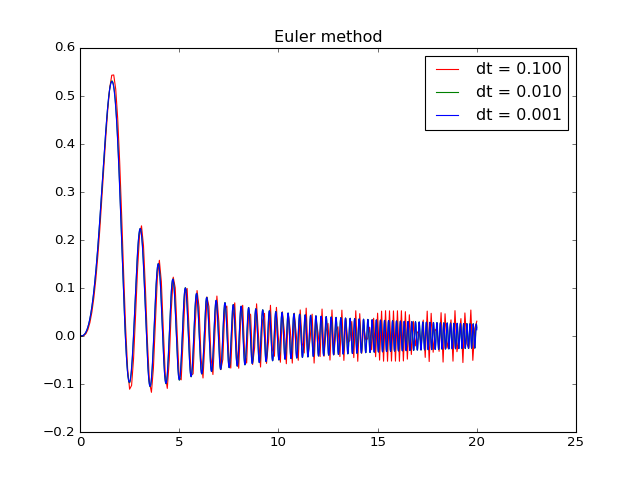

In [14]:
plt.close()
datList = []

for n in steplens:
    datList.append(buildEst(stepE, 0, 0, 20, n))

for i in range(len(datList)):
    plt.plot(datList[i][0], datList[i][1], pltcol[i], label='dt = %.3f' % (20.0/steplens[i]) )

plt.legend()
plt.title("Euler method")

<IPython.core.display.Javascript object>


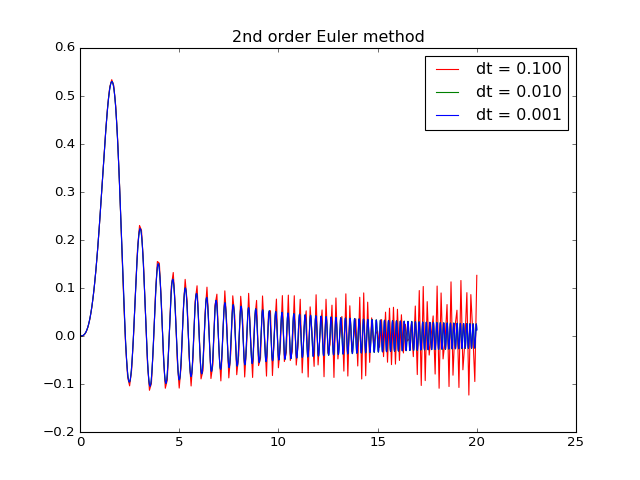

In [13]:
plt.close()
datList = []

for n in steplens:
    datList.append(buildEst(step2E, 0, 0, 20, n))

for i in range(len(datList)):
    plt.plot(datList[i][0], datList[i][1], pltcol[i], label='dt = %.3f' % (20.0/steplens[i]) )

plt.legend()
plt.title("2nd order Euler method")

d) Most accurate appears to be the small $dt$ (1/1000) 2nd order euler method.  The large dt 2nd order Euler method appears to be our worst simulation due to the 2nd derivative exploding.  Using $dt = 1/10^6$ we see convergence in the first few decimal positions. 

e) None of these methods tell us directly about the long-term behaviour of y, although it would appear to be tending towards 0 and the exact solution would seem to suggest this as well. 

$$\lim_{t \to \infty} y(t) = \lim_{t \to \infty} e^{-t} \int_0^t e^t \sin(t^2)dt$$

would appear to be zero, as the integral $\int_0^t e^t \sin(t^2)dt$ appears to be an order of magnitude smaller that $e^t$. 


## Euler approximations

The Euler method and its variations was the subject of your second homework assignment.  The *plain* first-order Euler method was based upon the approximation

$$y(t + \Delta t) \simeq y(t) + (\Delta t)f(t,y(t))$$

where we divide the time-domain interval $[a,b]$ into $n$ equal-length sub-intervals of length $\Delta t = \frac{b-a}{n}$.  


The second-order Euler method is the approximation

$$ y(t + \Delta t) \simeq y(t) + (\Delta t)f(t, y(t)) + \frac{\Delta t^2}{2} \bigg( \frac{\partial f}{\partial t}(t,y(t)) + \frac{\partial f}{\partial y}(t,y(t)) f(t,y(t)) \bigg)$$
